# TP DBSCAN


## EXERCICE 1 :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

In [6]:
# Générer des données en forme de lune
np.random.seed(0)
X, _ = make_moons(n_samples=200, noise=0.1)

Text(0, 0.5, 'Feature 2')

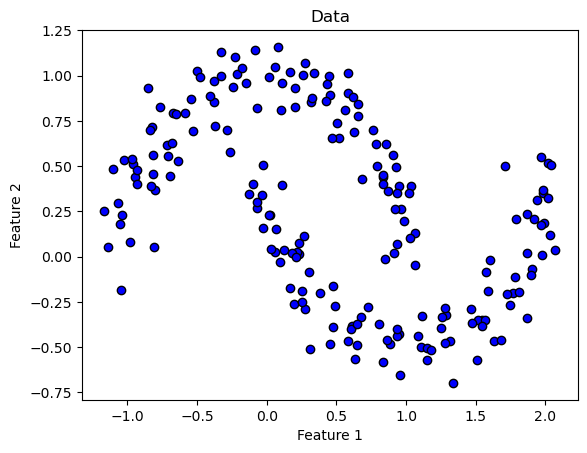

In [7]:
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', edgecolors='k')
plt.title("Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [8]:
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_scaled)

In [25]:
# Appliquer KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_clusters = kmeans.fit_predict(X_scaled)


C:\Users\HE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


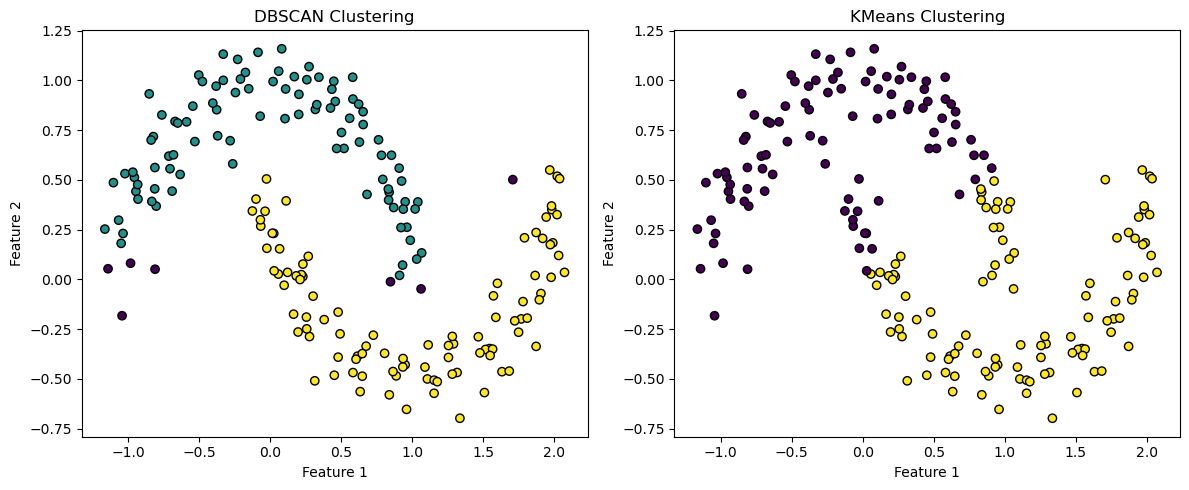

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_clusters, cmap='viridis', marker='o', edgecolors='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', edgecolors='k')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

## EXERCICE 2 :

In [28]:
import pandas as pd

In [29]:
# 1. Importer les données et effectuer l'EDA
file_path = r'C:\Users\HE\Desktop\Mall_Customers.csv'  # Full file path
df = pd.read_csv(file_path)
print(df.head())  # Afficher les premières lignes du dataframe
print(df.info())  # Informations sur le dataframe (types de données, valeurs manquantes, etc.)


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [31]:
# 2. Sélectionner les caractéristiques pertinentes et normaliser les données
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

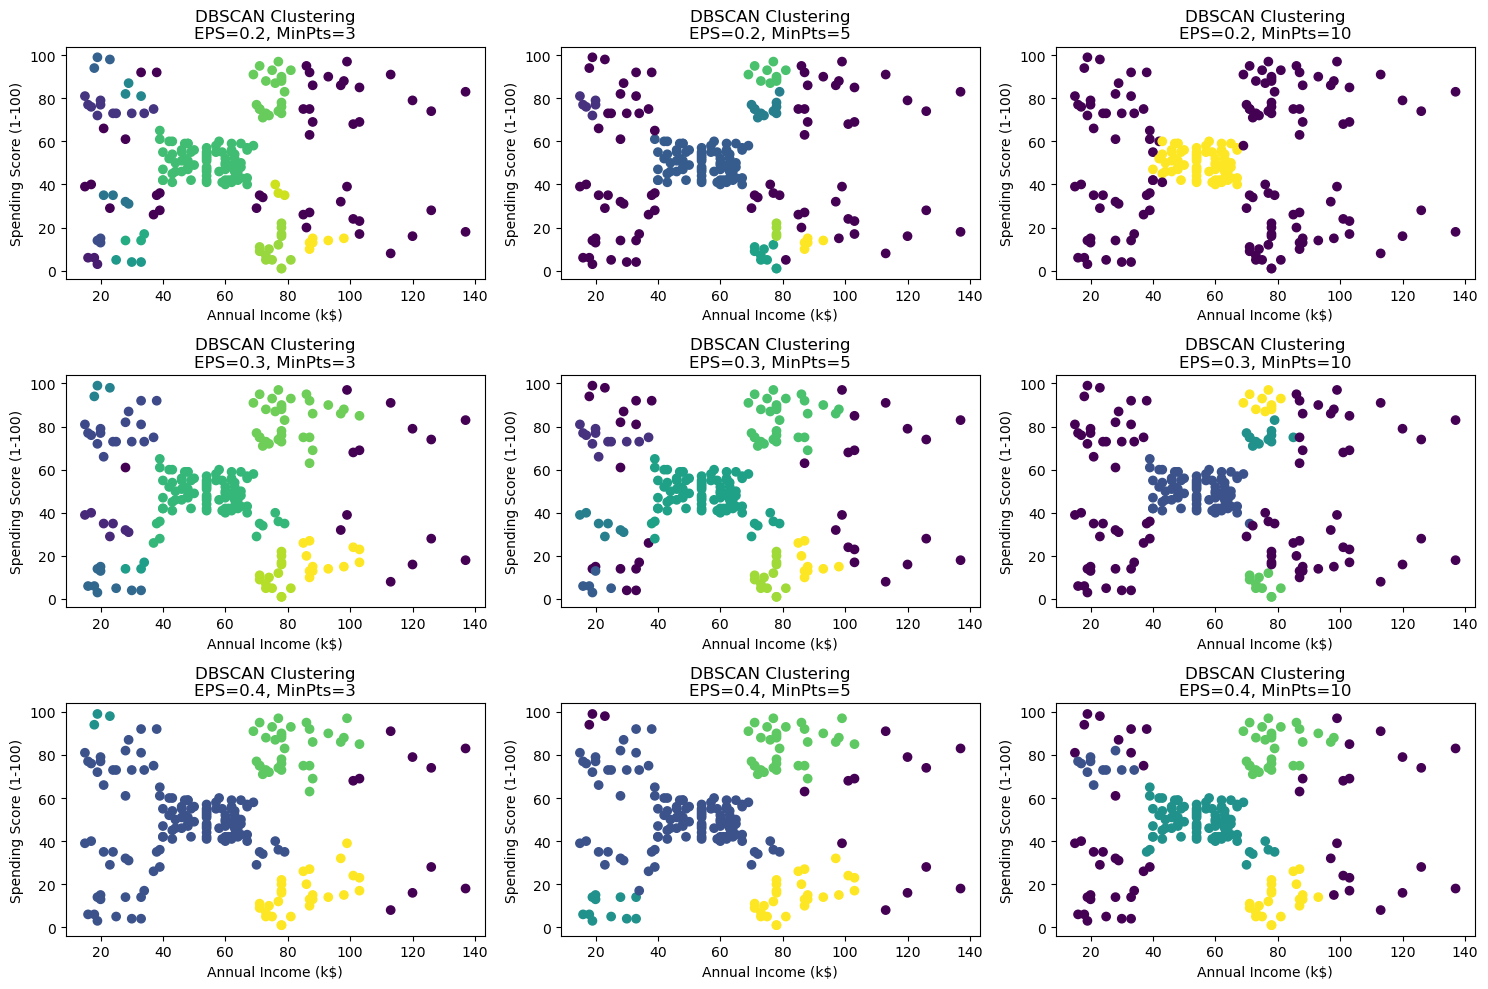

In [33]:
# 4. Appliquer DBSCAN avec différents paramètres
eps_values = [0.2, 0.3, 0.4]  # Valeurs d'EPS à essayer
min_samples_values = [3, 5, 10]  # Valeurs de MinPts à essayer

plt.figure(figsize=(15, 10))
plot_index = 1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)

        plt.subplot(len(eps_values), len(min_samples_values), plot_index)
        plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='viridis')
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score (1-100)')
        plt.title(f'DBSCAN Clustering\nEPS={eps}, MinPts={min_samples}')
        
        plot_index += 1

plt.tight_layout()
plt.show()